## Implementing Linear Regression using Gradiant Descent and Stochastic Gradiant Descent

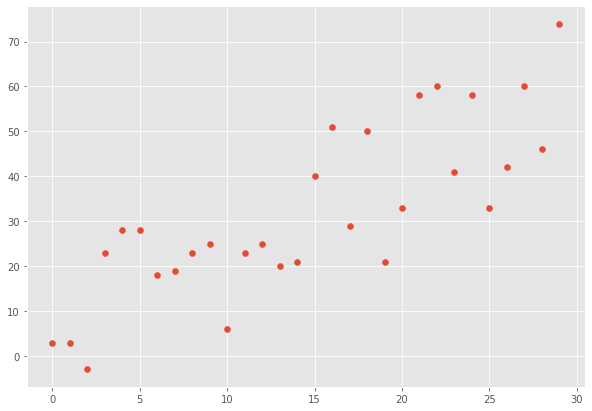

In [27]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import random

style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 7.0)

# A function to create a set of data points for a given variance and correlation
def dataset(data,variance,step=2,correlation=False):
    value=1
    ys=[]
    for i in range(data):
        a= random.randrange(-variance,variance) + value
        ys.append(a)
        if correlation and correlation=='pos':
            value+=step
        elif correlation and correlation=='neg':
            value-=step
    xs=[i for i in range(len(ys))]
    return np.array(xs), np.array(ys)

# 30 DATA POINTS, 20 VARIANCE, correlation strength = 2, positive correlation
X,y=dataset(30,20,2,'pos')
plt.scatter(X,y)

## Gradiant descent is an optimization algorithm to minimize a function.
## The function being minimized here is the loss function =  1/ N * Σ (y - y_pred)^2
## Optimal weights are calculated using gradient descent
### Weigth Update Rule : W_new = W_old - learning_rate * dloss/dW
### Learning rate = n

In [29]:
def Gradiant_descent(X,y, n = 0.1, epoch = 1000):
    np.random.seed(1)
    W= np.random.randn(1,1)
    b= np.random.randn(1)


    for i in range(epoch):
        y_pred= W[0]*X + b
        dw= (-2/len(X)) * sum(X*(y - y_pred))
        db= (-2/len(X)) * sum(y - y_pred)
        W= W - n * dw
        b= b - n * db
    print('Final Weight:', W)
    print('Final bias:', b)
    return W, b
    
W, b = Gradiant_descent(X,y , n = 0.001)

Final Weight: [[1.97101666]]
Final bias: [2.26806862]


### Plotting Regression line

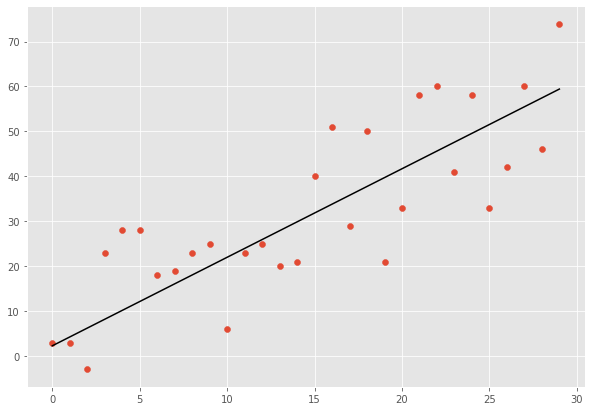

In [30]:
y_pred= W[0]*X + b

plt.scatter(X,y)
plt.plot(X,y_pred, c='black')
plt.show()

## Stochastic Gradient Descent 
## The function being minimized here is the loss function =  1/ N * (y - y_pred)^2
## The error is calculated for one data point at a time
## Stochastic Gradient Descent is memory efficient and works well for large datasets

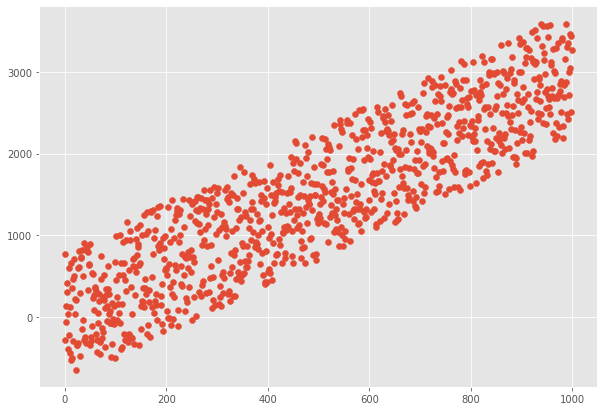

In [31]:
X,y=dataset(1000,800,3,'pos')
plt.scatter(X,y)

In [32]:
def Stochastic_Gradiant_descent(X,y, n = 0.1, epoch = 1000):
    np.random.seed(1)
    W= np.random.randn(1,1)
    b= np.random.randn(1)

    for i in range(epoch):
        for x_ , y_ in zip(X, y):
            y_pred= W[0]*x_ + b
            dw= -2/len(X) *(y_ - y_pred) * x_
            db= -2/len(X) *(y_ - y_pred)
            W= W - n * dw
            b= b - n * db
    print('Final Wight:', W)
    print('Final bias:', b)
    return W, b
    
W, b = Stochastic_Gradiant_descent(X,y , n = 0.0001)

Final Wight: [[3.10131997]]
Final bias: [-0.66789712]


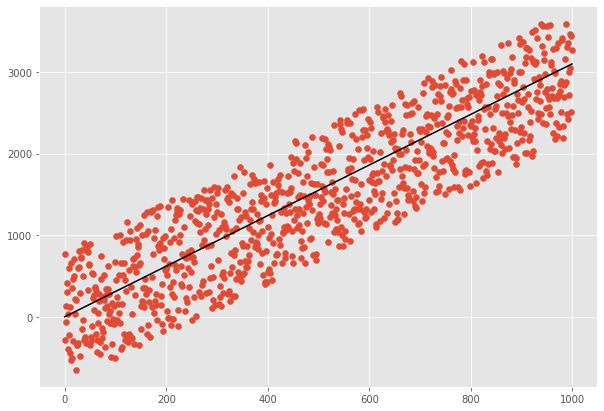

In [33]:
y_pred= W[0]*X + b

plt.scatter(X,y)
plt.plot(X,y_pred, c='black')
plt.show()